In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
#pd.set_option('max_column')

In [3]:
# Prepare Data
da = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
df = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
dw = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')

In [4]:
da.shape

(940, 15)

In [5]:
da.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
da.head(15)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [7]:
da.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
#Clean Data
da['Id'] = da['Id'].astype(str)
da['ActivityDate'] = pd.to_datetime(da['ActivityDate'], format= '%m/%d/%Y')
da.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [9]:
da['distance_diff'] = da['TotalDistance'] - da['TrackerDistance']

In [10]:
da['distance_diff']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
935    0.0
936    0.0
937    0.0
938    0.0
939    0.0
Name: distance_diff, Length: 940, dtype: float64

In [11]:
def check_same_column_values(da, distance_diff):
    # Check if all values in the specified column are the same
    return da[distance_diff].nunique() == 1

In [12]:
result = check_same_column_values(da, 'distance_diff')
print("Are all values in the column the same?", result)

Are all values in the column the same? False


In [13]:
def find_column_value_differences(da,distance_diff):
    # Find indices where values in the specified column differ
    differing_indices = da[distance_diff].diff().ne(0).cumsum()

    # Group by the differing indices and get the first index of each group
    differing_groups = differing_indices.groupby(differing_indices).idxmin()

    # Return indices where values differ
    return differing_groups.tolist()

In [14]:
differing_indices = find_column_value_differences(da, 'distance_diff')
print("Indices where values in the column differ:", differing_indices)

Indices where values in the column differ: [0, 689, 690, 693, 694, 707, 708, 711, 712, 713, 714, 717, 718, 719, 720, 724, 725, 726, 727, 728, 729, 731, 732, 733, 734, 735]


In [15]:
for index in differing_indices:
    print("Index:", index)
    print("Value at index:", da.loc[index, 'distance_diff'])

Index: 0
Value at index: 0.0
Index: 689
Value at index: 1.8299999237060511
Index: 690
Value at index: 0.0
Index: 693
Value at index: 0.19000053405762074
Index: 694
Value at index: 0.0
Index: 707
Value at index: 0.039999961853030896
Index: 708
Value at index: 0.0
Index: 711
Value at index: 0.8100004196166708
Index: 712
Value at index: 1.0499992370605398
Index: 713
Value at index: 0.7599997520446706
Index: 714
Value at index: 0.0
Index: 717
Value at index: 1.0699996948241903
Index: 718
Value at index: 0.9799995422362997
Index: 719
Value at index: 0.9000005722045987
Index: 720
Value at index: 0.0
Index: 724
Value at index: 1.1400003433228
Index: 725
Value at index: 0.0
Index: 726
Value at index: 1.1599998474121005
Index: 727
Value at index: 0.0
Index: 728
Value at index: 0.8800001144410015
Index: 729
Value at index: 0.0
Index: 731
Value at index: 0.4600000381469691
Index: 732
Value at index: 1.159999847412129
Index: 733
Value at index: 0.0
Index: 734
Value at index: 1.0600004196166992
Ind

In [16]:
da.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [17]:
da.rename(columns={
    'ActivityDate': 'Activity_Date',
    'TotalSteps': 'Total_Steps',
    'TotalDistance': 'Total_Distance',
    'TrackerDistance': 'Tracker_Distance',
    'LoggedActivitiesDistance': 'Logged_Activities_Distance',
    'VeryActiveDistance': 'Very_Active_Distance',
    'ModeratelyActiveDistance': 'Moderately_Active_Distance',
    'LightActiveDistance': 'Light_Active_Distance',
    'SedentaryActiveDistance': 'Sedentary_Active_Distance',
    'VeryActiveMinutes': 'Very_Active_Minutes',
    'FairlyActiveMinutes': 'Fairly_Active_Minutes',
    'LightlyActiveMinutes': 'Lightly_Active_Minutes',
    'SedentaryMinutes': 'Sedentary_Minutes'
}, inplace=True)

In [18]:
print(da.head())

           Id Activity_Date  Total_Steps  Total_Distance  Tracker_Distance  \
0  1503960366    2016-04-12        13162            8.50              8.50   
1  1503960366    2016-04-13        10735            6.97              6.97   
2  1503960366    2016-04-14        10460            6.74              6.74   
3  1503960366    2016-04-15         9762            6.28              6.28   
4  1503960366    2016-04-16        12669            8.16              8.16   

   Logged_Activities_Distance  Very_Active_Distance  \
0                         0.0                  1.88   
1                         0.0                  1.57   
2                         0.0                  2.44   
3                         0.0                  2.14   
4                         0.0                  2.71   

   Moderately_Active_Distance  Light_Active_Distance  \
0                        0.55                   6.06   
1                        0.69                   4.71   
2                        0.40   

In [19]:
da.columns = da.columns.str.lower()
print(da.head())

           id activity_date  total_steps  total_distance  tracker_distance  \
0  1503960366    2016-04-12        13162            8.50              8.50   
1  1503960366    2016-04-13        10735            6.97              6.97   
2  1503960366    2016-04-14        10460            6.74              6.74   
3  1503960366    2016-04-15         9762            6.28              6.28   
4  1503960366    2016-04-16        12669            8.16              8.16   

   logged_activities_distance  very_active_distance  \
0                         0.0                  1.88   
1                         0.0                  1.57   
2                         0.0                  2.44   
3                         0.0                  2.14   
4                         0.0                  2.71   

   moderately_active_distance  light_active_distance  \
0                        0.55                   6.06   
1                        0.69                   4.71   
2                        0.40   

In [20]:
#Review for null values
da.isna()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,distance_diff
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
da.isna()
any_null_values = da.isna().any().any()

if any_null_values:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


In [22]:
#Review for Duplicate Values
da.duplicated().sum()

0

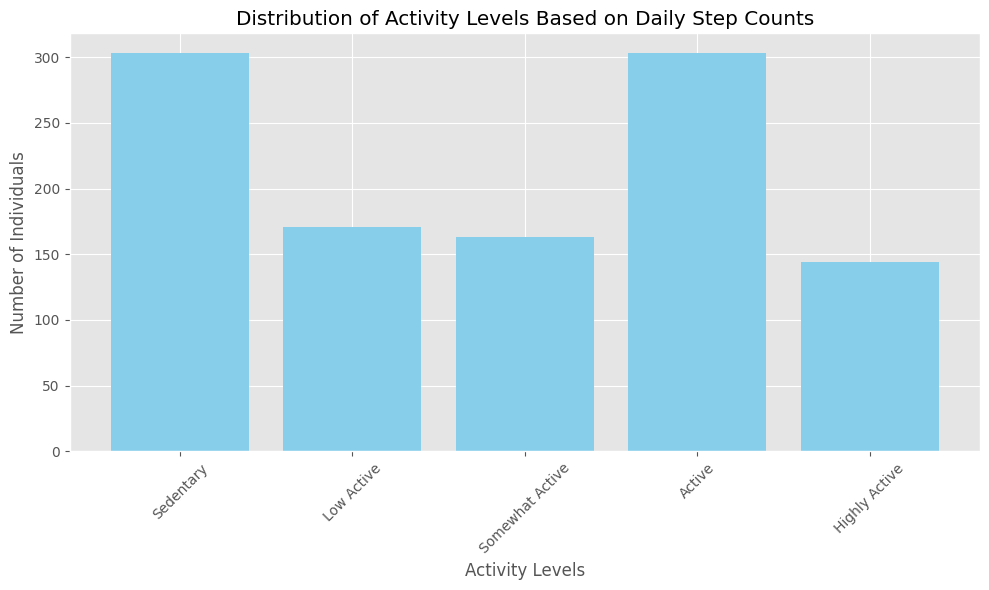

In [23]:
# Analyze the Data
# Sedentary: <5000 steps/day
# Low Activity: 5000-7499 steps/day,typical of daily activity excluding sports/exercise
# Somewhat Active: 7500-9999 steps/day, likely includes some volitional activities (and/or elevated occupational activity demands)
# Active: >=10000 steps/day
# Highly Active: >12500 steps/day
# Citation: Tudor-Locke C, Bassett DR Jr. How many steps/day are enough? Preliminary pedometer indices for public health. Sports Med. 2004;34(1):1-8. doi: 10.2165/00007256-200434010-00001. PMID: 14715035.

# Define the activity levels and corresponding step ranges
activity_levels = ['Sedentary', 'Low Active', 'Somewhat Active', 'Active', 'Highly Active']
step_ranges = ['<5000', '5000-7499', '7500-9999', '>=10000', '>12500']

# Define the counts of individuals falling into each activity level
step_counts = [
    da[da['total_steps'] < 5000]['total_steps'].count(),
    da[(da['total_steps'] >= 5000) & (da['total_steps'] < 7500)]['total_steps'].count(),
    da[(da['total_steps'] >= 7500) & (da['total_steps'] < 10000)]['total_steps'].count(),
    da[da['total_steps'] >= 10000]['total_steps'].count(),
    da[da['total_steps'] > 12500]['total_steps'].count()
]

# Generate a bar graph
plt.figure(figsize=(10, 6))
plt.bar(activity_levels, step_counts, color='skyblue')

# Add labels and title
plt.xlabel('Activity Levels')
plt.ylabel('Number of Individuals')
plt.title('Distribution of Activity Levels Based on Daily Step Counts')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [24]:
df.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed'],
      dtype='object')

In [25]:
df.head(15)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
5,1503960366,4/19/2016 12:00:00 AM,1,304,320
6,1503960366,4/20/2016 12:00:00 AM,1,360,377
7,1503960366,4/21/2016 12:00:00 AM,1,325,364
8,1503960366,4/23/2016 12:00:00 AM,1,361,384
9,1503960366,4/24/2016 12:00:00 AM,1,430,449


In [26]:
df.shape

(413, 5)

In [27]:
df.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [28]:
new_column_names = {
    'Id': 'id',
    'SleepDay': 'sleep_day',
    'TotalSleepRecords': 'total_sleep_records',
    'TotalMinutesAsleep': 'total_minutes_asleep',
    'TotalTimeInBed': 'total_time_in_bed'
}

df.rename(columns=new_column_names, inplace=True)
print(df.head())

           id              sleep_day  total_sleep_records  \
0  1503960366  4/12/2016 12:00:00 AM                    1   
1  1503960366  4/13/2016 12:00:00 AM                    2   
2  1503960366  4/15/2016 12:00:00 AM                    1   
3  1503960366  4/16/2016 12:00:00 AM                    2   
4  1503960366  4/17/2016 12:00:00 AM                    1   

   total_minutes_asleep  total_time_in_bed  
0                   327                346  
1                   384                407  
2                   412                442  
3                   340                367  
4                   700                712  


In [29]:
df['id'] = df['id'].astype(str)

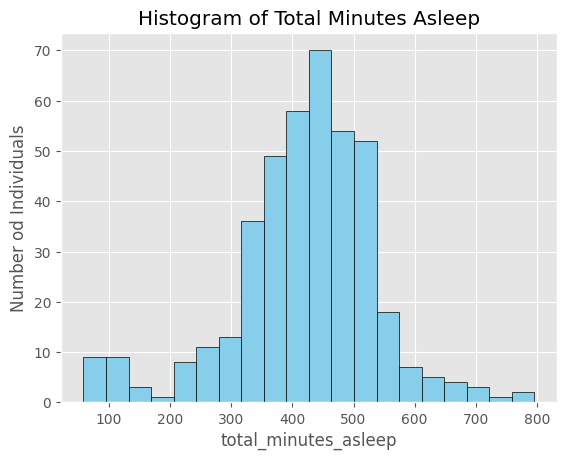

In [30]:
plt.hist(df['total_minutes_asleep'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('total_minutes_asleep')
plt.ylabel('Number od Individuals')
plt.title('Histogram of Total Minutes Asleep')
plt.grid(True)
plt.show()

In [31]:
df.isna()
any_null_values = df.isna().any().any()

if any_null_values:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


In [32]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

Empty DataFrame
Columns: [id, sleep_day, total_sleep_records, total_minutes_asleep, total_time_in_bed]
Index: []


In [33]:
df['sleep_day'] = pd.to_datetime(df['sleep_day'], format='%Y-%m-%d', errors='coerce')

In [34]:
df['sleep_day'] = pd.to_datetime(df['sleep_day'], errors='coerce')
print(df.head())

           id sleep_day  total_sleep_records  total_minutes_asleep  \
0  1503960366       NaT                    1                   327   
1  1503960366       NaT                    2                   384   
2  1503960366       NaT                    1                   412   
3  1503960366       NaT                    2                   340   
4  1503960366       NaT                    1                   700   

   total_time_in_bed  
0                346  
1                407  
2                442  
3                367  
4                712  


In [35]:
dw.shape

(67, 8)

In [36]:
dw.columns

Index(['Id', 'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI',
       'IsManualReport', 'LogId'],
      dtype='object')

In [37]:
dw.head(15)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
5,4319703577,4/17/2016 11:59:59 PM,72.400002,159.614681,25.0,27.450001,True,1460937599000
6,4319703577,5/4/2016 11:59:59 PM,72.300003,159.394222,NaN,27.379999,True,1462406399000
7,4558609924,4/18/2016 11:59:59 PM,69.699997,153.662190,NaN,27.250000,True,1461023999000
8,4558609924,4/25/2016 11:59:59 PM,70.300003,154.984977,NaN,27.459999,True,1461628799000
9,4558609924,5/1/2016 11:59:59 PM,69.900002,154.103125,NaN,27.320000,True,1462147199000


In [38]:
dw.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [39]:
new_column_names = {
    'Id': 'id',
    'Date': 'date',
    'WeightKg': 'weight_kg',
    'WeightPounds': 'weight_pounds',
    'Fat': 'fat',
    'BMI': 'bmi',
    'IsManualReport': 'is_manual_report',
    'LogId': 'log_id'
}

dw.rename(columns=new_column_names, inplace=True)
print(dw.head())

           id                   date   weight_kg  weight_pounds   fat  \
0  1503960366   5/2/2016 11:59:59 PM   52.599998     115.963147  22.0   
1  1503960366   5/3/2016 11:59:59 PM   52.599998     115.963147   NaN   
2  1927972279   4/13/2016 1:08:52 AM  133.500000     294.317120   NaN   
3  2873212765  4/21/2016 11:59:59 PM   56.700001     125.002104   NaN   
4  2873212765  5/12/2016 11:59:59 PM   57.299999     126.324875   NaN   

         bmi  is_manual_report         log_id  
0  22.650000              True  1462233599000  
1  22.650000              True  1462319999000  
2  47.540001             False  1460509732000  
3  21.450001              True  1461283199000  
4  21.690001              True  1463097599000  


In [40]:
dw['id'] = dw['id'].astype(str)

In [41]:
dw.dtypes

id                   object
date                 object
weight_kg           float64
weight_pounds       float64
fat                 float64
bmi                 float64
is_manual_report       bool
log_id                int64
dtype: object

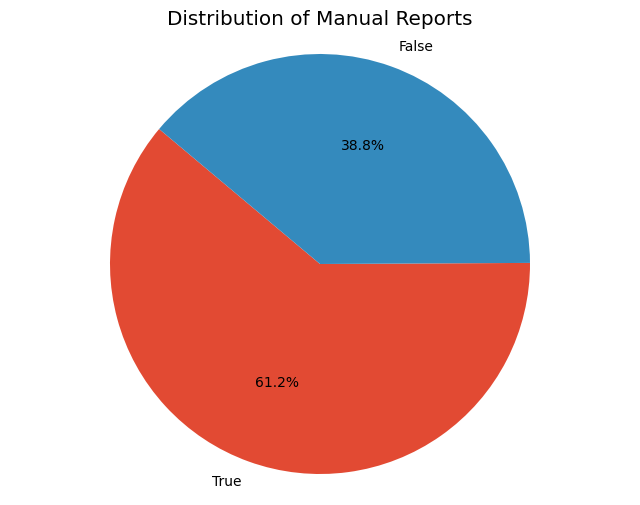

In [42]:
report_counts = dw['is_manual_report'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(report_counts, labels=report_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Manual Reports')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
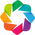

:Sankey   [source,target]   (value)

In [43]:
from matplotlib.sankey import Sankey

import holoviews as hv

# Assuming da, df, and dw are your DataFrames containing step count, sleep count, and weight count respectively

# Counting the number of unique participants in each dataset
step_participants = da['id'].nunique()
sleep_participants = df['id'].nunique()
weight_participants = dw['id'].nunique()

# Creating DataFrame for edges
edges = pd.DataFrame({
    'source': ['Step Count', 'Sleep Count', 'Weight Count'],
    'target': ['Participants', 'Participants', 'Participants'],
    'value': [step_participants, sleep_participants, weight_participants]
})

# Create Sankey diagram with Holoviews
sankey = hv.Sankey(edges, label='Comparison of Number of Participants')

# Render the Sankey diagram using the Bokeh backend
hv.extension('bokeh')

# Customize Sankey diagram options
sankey.opts(label_position='left', edge_color='target', node_color='index', cmap='tab20')

sankey